In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

%run utility_functions.py # functions reused throughout

0    16258
1     1639
Name: 0, dtype: int64

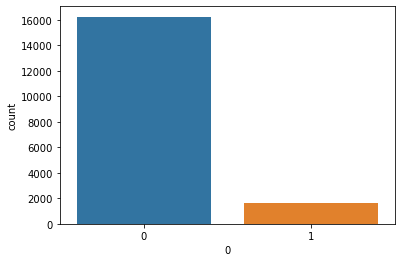

In [2]:
# Dataset source:
# http://archive.ics.uci.edu/ml/datasets/HTRU2#

# Read in data
data = pd.read_csv('../data/HTRU2/HTRU_2.csv', sep=',')

sns.countplot(data.iloc[:,-1]) # plot number of things with each value

data.iloc[:,-1].value_counts(sort=True)
# skewed toward predicting negative

In [3]:
# Create training, testing, and validation sets

X = data.drop(data.columns[-1], axis=1) # last value is the pulsar indicator

y = data.iloc[:,-1]


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20 default

# scale so it converges
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [4]:
clf = svm.SVC(random_state=0)


parameters = {'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto'],
              'C': [1, 10, 100],
              'shrinking': [True, False],
              'break_ties': [True, False],
              'tol': [1e-3, 1e-4],
              'max_iter': [1000, 10000, 100000],
              'probability': [True]
             }


# scorer for parameter combinations
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set clf to best combination of parameters
clf = grid_obj.best_estimator_

In [5]:
# train model 
clf.fit(x_train, y_train)

SVC(C=100, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100000, probability=True, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

No Skill: ROC AUC=0.500
Model: ROC AUC=0.965


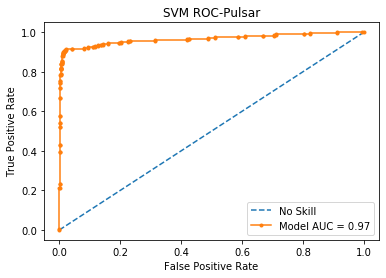

Model: f1=0.877 auc=0.908


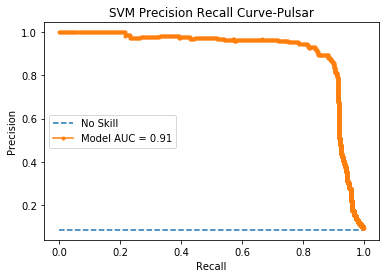

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3277
           1       0.92      0.84      0.88       303

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Confusion Matrix
[[3255   22]
 [  49  254]]
Accuracy
0.9801675977653631
Balanced Accuracy
0.9157851854761307


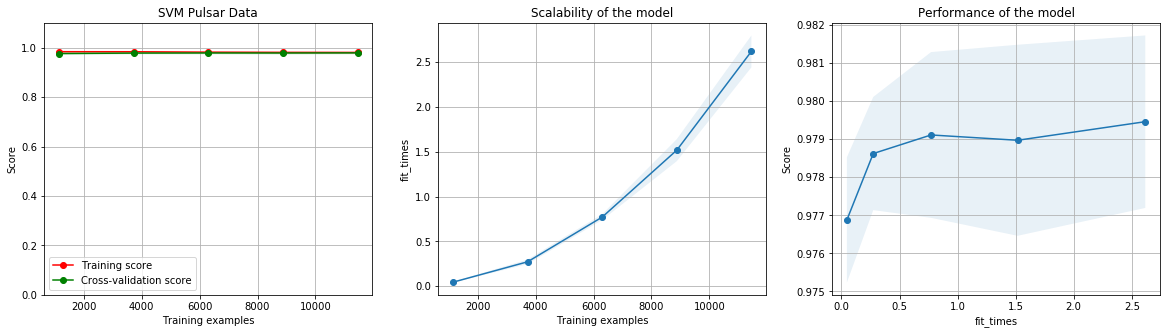

In [6]:
# test
y_predict = clf.predict(x_test)

# ROC
plot_roc(clf, x_test, y_test, y_predict, 'SVM ROC-Pulsar')
# Recall_precision_curve
plot_precision_recall_curve(clf, x_test, y_test, y_predict, 'SVM Precision Recall Curve-Pulsar')


# how did we do? Comparing y_test and predicted values
print('Classification Report')
print(classification_report(y_test, y_predict,zero_division=1))
print('Confusion Matrix')
# how to interpret: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
print(confusion_matrix(y_test, y_predict))
print('Accuracy')
print(accuracy_score(y_test, y_predict))

# for unbalanced data
print('Balanced Accuracy')
print(balanced_accuracy_score(y_test, y_predict))

# 1.1 so I can see the top of the plot
plot_learning_curve(clf, "SVM Pulsar Data", x_train, y_train, ylim=[0,1.1])

# filter warnings

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

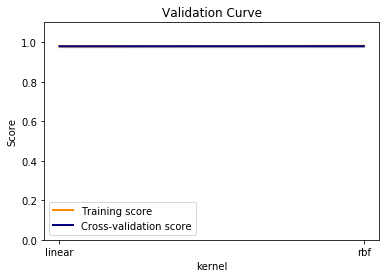

In [8]:
plot_model_complexity_analysis(clf, 'kernel', ['linear', 'rbf'], 'SVM_pulsar', x_train, y_train)

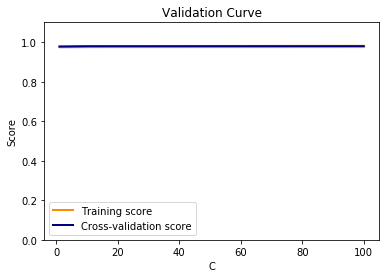

In [9]:
plot_model_complexity_analysis(clf, 'C', [1, 10, 100], 'SVM_pulsar', x_train, y_train)

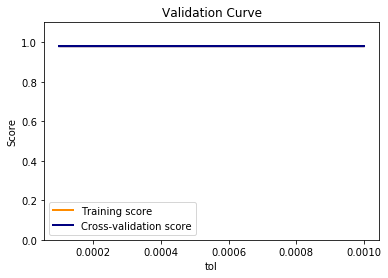

In [10]:
plot_model_complexity_analysis(clf, 'tol', [1e-3, 1e-4], 'SVM_pulsar', x_train, y_train)

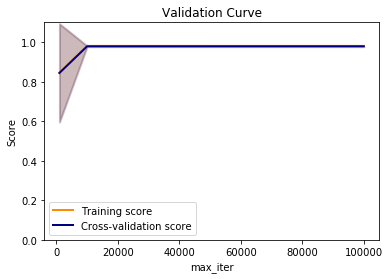

In [11]:
plot_model_complexity_analysis(clf, 'max_iter', [1000, 10000, 100000], 'SVM_pulsar', x_train, y_train)